In [162]:
import matplotlib.pyplot as plt
import torch
import torchvision
import time

In [163]:
#hyper-parameters
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 512
LR = 1

In [164]:
torch.cuda.is_available(),torch.cuda.get_device_name(),torch.cuda.device_count()

(True, 'NVIDIA Quadro GV100', 2)

In [165]:
train_loader = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST('data', train=True, download=True, 
                           transform=torchvision.transforms.Compose([
                           torchvision.transforms.ToTensor(),
                           torchvision.transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=BATCH_SIZE, shuffle=True)
print(len(train_loader)) #the size of dataset, 60000 of images



#load test data
test_loader = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST('data', train=False, 
                           transform=torchvision.transforms.Compose([
                           torchvision.transforms.ToTensor(),
                           torchvision.transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=BATCH_SIZE, shuffle=True)
print(len(test_loader)) #size of test data , 10000 images

118
20


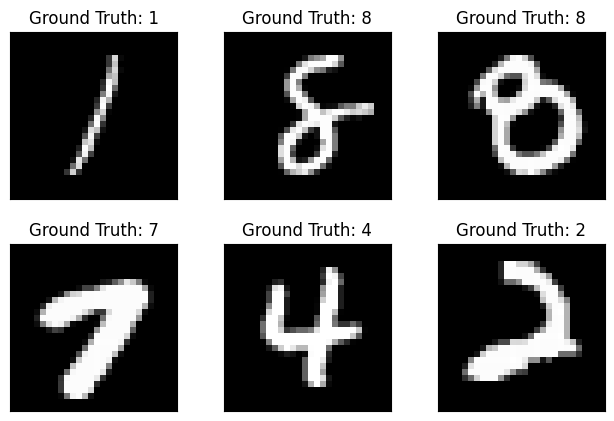

In [166]:
#have a look on data

examples = enumerate(test_loader)
id, (image,label) = next(examples)
#examples is a batch of images, 
#when BATCH_SIZE == 1:
#example[0] is a order signed by enumerate(), 
#example[1][0] is the tensor of image,
#example[1][1] is the label of the image 0~9

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(image[0][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(label[0]))
  plt.xticks([])
  plt.yticks([])
  id, (image,label) = next(examples)

In [167]:
# model
model = torch.nn.Sequential(
    
    torch.nn.Linear(784,800),
    torch.nn.ReLU(),
    torch.nn.Linear(800,50),
    torch.nn.ReLU(),
    torch.nn.Linear(50,10),
    torch.nn.Softmax(),
)
model.to(DEVICE)

Sequential(
  (0): Linear(in_features=784, out_features=800, bias=True)
  (1): ReLU()
  (2): Linear(in_features=800, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=10, bias=True)
  (5): Softmax(dim=None)
)

In [168]:
# loss function & optimizater
loss_fn = torch.nn.NLLLoss() #nll_loss for classification
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [169]:
# Accuracy check round 1(before training)
start = time.time()

correct_counter = 0 # count the number of right prediction
data_counter = 0 # count the number of data

for image,label in test_loader:#the size of image and label depends on BATCH_SIZE
    
    image = image.reshape(-1,784) #change image's shape so each row is a image 

    output = model(image.cuda())
    
    label_list = label.tolist()# turn label to list for comparison with prediction
    
    data_counter += len(label_list) # the number of test datas
    
    for i in range(output.shape[0]): # =512
        if int(torch.argmax(output[i])) == label_list[i]: # prediction = label
            correct_counter += 1 

end = time.time()
accuracy = correct_counter/data_counter
print('accuracy {} time {} datasize {} correctness {}'
      .format(accuracy, end-start, data_counter, correct_counter))
accuracy, end-start, 

accuracy 0.0799 time 1.508430004119873 datasize 10000 correctness 799


(0.0799, 1.508430004119873)

In [170]:
#Trainning process
loss_list = []

for image,label in train_loader:
    
    optimizer.zero_grad()
    
    input = image.reshape(-1,784)
    output = model(input.cuda())
    
    loss = loss_fn(output,label.cuda())
    loss_list.append(loss.item())
    loss.backward()
    optimizer.step()
    
    print('loss {}'.format(loss.item()))

loss -0.10017473995685577
loss -0.10306074470281601
loss -0.10953407734632492
loss -0.11705583333969116
loss -0.12639132142066956
loss -0.13779594004154205
loss -0.1541164368391037
loss -0.18542949855327606
loss -0.23296524584293365
loss -0.2936588227748871
loss -0.35106050968170166
loss -0.416632741689682
loss -0.4371362626552582
loss -0.373837947845459
loss -0.335959792137146
loss -0.4729582369327545
loss -0.46293318271636963
loss -0.47461315989494324
loss -0.5020373463630676
loss -0.44145163893699646
loss -0.5169680714607239
loss -0.5462380051612854
loss -0.5378059148788452
loss -0.48301634192466736
loss -0.556415855884552
loss -0.5340213179588318
loss -0.5626162886619568
loss -0.6209969520568848
loss -0.63551265001297
loss -0.6514523029327393
loss -0.6502425074577332
loss -0.692909836769104
loss -0.6778972148895264
loss -0.7033178806304932
loss -0.7137466073036194
loss -0.7123806476593018
loss -0.7085794806480408
loss -0.7143822908401489
loss -0.7480090260505676
loss -0.74082148075

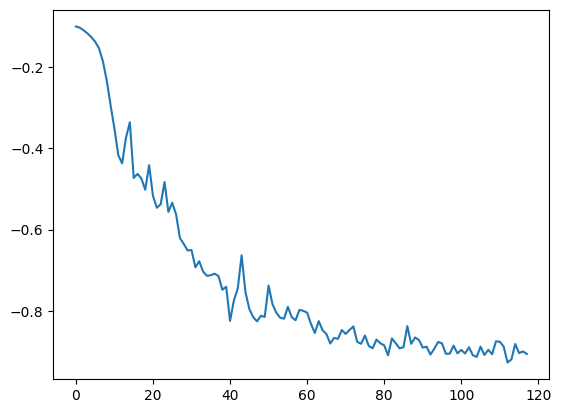

In [171]:
plt.plot(list(loss_list))

In [172]:
# Accuracy check round 2(after training)
start = time.time()

correct_counter = 0 # count the number of right prediction
data_counter = 0 # count the number of data

for image,label in test_loader:#the size of image and label depends on BATCH_SIZE
    
    image = image.reshape(-1,784) #change image's shape so each row is a image 

    output = model(image.cuda())
    
    label_list = label.tolist()# turn label to list for comparison with prediction
    
    data_counter += len(label_list) # the number of test datas
    
    for i in range(output.shape[0]): # =512
        if int(torch.argmax(output[i])) == label_list[i]: # prediction = label
            correct_counter += 1 

end = time.time()
accuracy = correct_counter/data_counter
print('accuracy {} time {} datasize {} correctness {}'
      .format(accuracy, end-start, data_counter, correct_counter))
accuracy, end-start, 
        

accuracy 0.9036 time 1.5143282413482666 datasize 10000 correctness 9036


(0.9036, 1.5143282413482666)

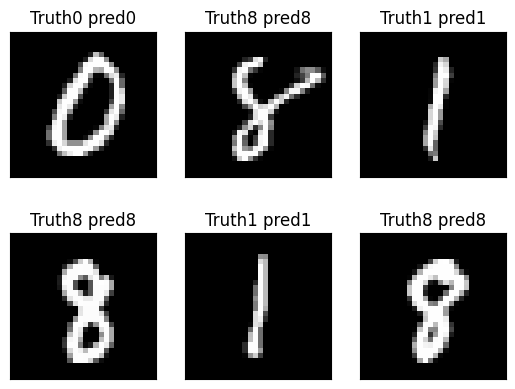

In [173]:
#have a look on performance
examples = enumerate(test_loader)
id, (image,label) = next(examples)

image = image[0:6].reshape(-1,784)
output = model(image.cuda())
label = label[0:6]
pred = []
for i in range(len(output)):
    pred.append(int(torch.argmax(output[i])))

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
#   plt.tight_layout()
  plt.imshow(image[i].reshape(28,28), cmap='gray')
  plt.title("Truth{} pred{}".format(label[i],pred[i]))
  plt.xticks([])
  plt.yticks([])